<a href="https://colab.research.google.com/github/fraserrbarclay/PythonWork-CodeDivision-10-23/blob/main/Week_7_Correlation_and_visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Describing the data relatively and visually
---

This worksheet introduces two new libraries:

**matplotlib**

A library of functions for plotting static, animated and interactive visualisations of data sets.  For ease, pandas use matplotlib for plotting a range of charts.

**scipy**

A library of functions for interpolating, optimising, linear regression, etc  

---

A dataset will be read into a dataframe, cleaned, wrangled and so prepared for summarising and the telling of stories through visualisations and summaries.

So far we have covered statistical measures over an individual series.  Linear regression reports correlation between the values in two series.

To get the results of a linear regression:  
*  import the `linregress` function from the `scipy.stats` package
*  run the `linregress` function with the two axes assigning the result to a variable (e.g. `regression`)

The result of the linregress function is a set of variables:  
*  `slope`, `intercept` - the gradient and y-intercept of the regression line (the line of best fit between the two series) are in `regression.slope` and `regression.intercept`
*  `rvalue` - the correlation coefficient - this indicates how closely the line drawn from the linear regression data fits the actual data, the closer to 1 the better the fit
*  `pvalue` - the probability of error if the regression line is extended to predict
*  the standard error is in `regression.stderr` and is the average distance of each data point from the lineof best fit


Further information [here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html)


### Exercise 1 - is age closely related to income?
---

Use linear regression to compare the columns 'Age' and 'Income' in the data set 'Income-Data' at this url:  
https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/Income-Data.xlsx?raw=true  

To do this:
*  import the pandas library  


*  import the **linregress** function from the library **scipy.stats**  (`from scipy.stats import linregress`)  


*  open the Excel file at the url above, using the sheet_name '`county-level`', reading the data into a dataframe called **county_level_df**  


*  create a variable called **x** and assign the '`Age`' column of the `county_level_df` dataframe   


*  create a variable called **y** and assign the '`Income`' column of the `county_level_df` dataframe   


*  create a variable called **regression** and assign the result of running the linregress function with `x`, `y` as its parameters ( `linregress(x,y)` )   


*  display the regression  
(*Expected output:  LinregressResult(slope=-0.31433084434233205, intercept=72.78388856978748, rvalue=-0.14787411576068246, pvalue=0.5581637648902298, stderr=0.5255739814332189*)  


*  display the slope (`regression.slope`)  
(*Expected output: -0.31433084434233205 - this indicates that the line plotting Age against Income slopes downward implying that income reduces with age*)  


*  display the intercept (`regression.intercept`)  
(*Expected output: 72.78388856978748 - this indicates that income level starts at 72.78388856978748 and reduces from there by age*)    


*  display the rvalue (which indicates how closely income follows age and whether it goes up as age goes up or goes down as age goes up

In [3]:
import pandas as pd

In [4]:
from scipy.stats import linregress

In [5]:
county_level_df = pd.read_excel("https://github.com/fraserrbarclay/PythonWork-CodeDivision-10-23/raw/main/data/Income-Data.xlsx","county-level")
county_level_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   State       18 non-null     object
 1   County      18 non-null     int64 
 2   Population  18 non-null     int64 
 3   Age         18 non-null     int64 
 4   Income      18 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 848.0+ bytes


In [6]:
x = county_level_df["Age"]
y= county_level_df['Income']

In [7]:
regression = linregress(x,y)
display(regression)

LinregressResult(slope=-0.31433084434233205, intercept=72.78388856978748, rvalue=-0.14787411576068246, pvalue=0.5581637648902298, stderr=0.5255739814332189, intercept_stderr=16.08233482195521)

In [8]:
display(regression.slope)

-0.31433084434233205

In [9]:
display(regression.intercept)

72.78388856978748

In [10]:
display(regression.rvalue)

-0.14787411576068246

### Exercise 2 - Could Population predict Income?  
---

Repeat the steps in exercise 1 to see if there is a clearer correlation between Population and Income.  

Add a statement in the text cell to describe your findings.

**Test output**:   
0.013558605755058871


In [11]:
x2 = county_level_df['Population']
regression2 = linregress(x2,y)
print(f'The slope of regression is {regression2.slope} and the rvalue is {regression2.rvalue}')

The slope of regression is 0.05737132629483762 and the rvalue is 0.11644142628402862


### Exercise 3 - Does Stress predict Wellbeing?
---

Repeat the steps in Exercises 1 & 2 to see if you can find a statistically significant result.

Add a statement in the text cell to describe your findings

* Read the dataset: "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"

* perform linear regression  
* look at r_squared and pvalue to get an idea of how predictive and significant these variables are

* save slope and intercepts in variables for later

Challenge:  
Write a function that checks the significance of a regression and displays a message indicating the result.

**Test output**:  
LinregressResult(slope=-0.6279050248852254, intercept=37.713488379900454, rvalue=-0.6713959740851134, pvalue=6.084540561441803e-07, stderr=0.10694652962765022)  
r sqr = 0.4507725540176983  
model is significant, p < .05:  6.084540561441803e-07  

# Visualising the data
---

There are a good number of libraries available containing functions for visualising data with bar charts, pie charts, line plots, box plots, scatter plots and, in some libraries, with more image based visualisations.

To keep it relatively simple, we will use matplotlib, a widely used library with a wide range of visualisation functions for data sets and mathematical equations.  It has the main functions we will use in this course:
*  bar charts
*  pie charts
*  line plots
*  box plots
*  scatter plots
*  histogram

Each requires these things:  
1. Select the data columns to be plotted
2. Prepare the data (remove null values, clean formats, etc)  
3. Run the function for the required plot

Once you have the hang of these, you can start to look at labelling, colouring, etc.

In order to begin creating visualisations, you need to:  
* import **matplotlib** as **plt**

Test output for Exercises 4 to 10 is in this [image](https://drive.google.com/file/d/1LYxLJyur_zgzvJcv_C1WGm21nf07ddY6/view?usp=sharing)

#  Bar charts and Line Plots
---

For these exercises, use the Excel data file:

'public-use-talent-migration' looking at sheet_name 'Country Migration'  
https://github.com/futureCodersSE/working-with-data/blob/main/Data%20sets/public_use-talent-migration.xlsx?raw=true

**Example**:  

Watch the video [here](https://drive.google.com/file/d/1eNOy7fhkB2CSfVdb66kqB66qXfoPfOpd/view?usp=sharing) - demonstration of creating a bar chart using the `matplotlib` library `pyplot`.  Then have a go at creating it yourself.

In [12]:
import matplotlib.pyplot as plt

In [13]:
migration_df=pd.read_excel("https://github.com/fraserrbarclay/PythonWork-CodeDivision-10-23/raw/main/data/public_use-talent-migration.xlsx","Country Migration")

### Exercise 4 - Line plot of net migration
---

Creating a line plot of mean net migration over the years 2015 to 2019

* create a new dataframe containing only the five columns holding net migration
* create a new data variable to hold the means of the five columns
* create a labels variable to hold the keys (column headings)
* use plt.plot(x, y) to plot your line chart

***Presentation tips:***   
Plot the chart, then add formatting, then show the plot   

Rotate the x-axis labels in the plot:  
`plt.xticks(rotation=45)`  

Show the grid:  
`plt.grid()`  

When all formatting has been done, show the plot:   
`plt.show()`

In [14]:
  migration_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4148 entries, 0 to 4147
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   base_country_code         4148 non-null   object 
 1   base_country_name         4148 non-null   object 
 2   base_lat                  4148 non-null   float64
 3   base_long                 4148 non-null   float64
 4   base_country_wb_income    4148 non-null   object 
 5   base_country_wb_region    4148 non-null   object 
 6   target_country_code       4148 non-null   object 
 7   target_country_name       4148 non-null   object 
 8   target_lat                4148 non-null   float64
 9   target_long               4148 non-null   float64
 10  target_country_wb_income  4148 non-null   object 
 11  target_country_wb_region  4148 non-null   object 
 12  net_per_10K_2015          4148 non-null   float64
 13  net_per_10K_2016          4148 non-null   float64
 14  net_per_

In [15]:
net_per_10k_df=migration_df.iloc[:,12:17]

In [16]:
net_per_10k_df_means=net_per_10k_df.mean(axis=0)

In [17]:
labels = net_per_10k_df.columns.tolist()

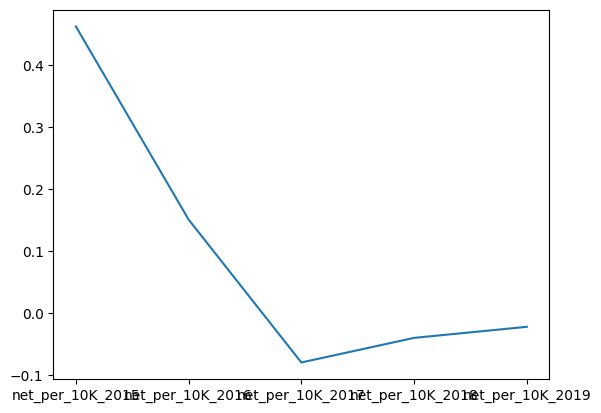

In [18]:
plt.plot(labels,net_per_10k_df_means)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'net_per_10K_2015'),
  Text(1, 0, 'net_per_10K_2016'),
  Text(2, 0, 'net_per_10K_2017'),
  Text(3, 0, 'net_per_10K_2018'),
  Text(4, 0, 'net_per_10K_2019')])

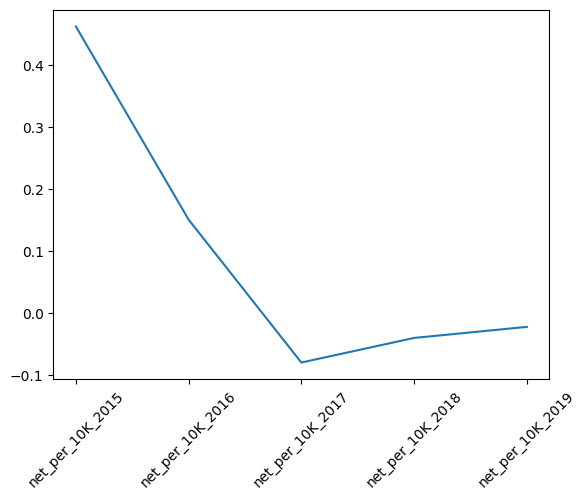

In [19]:
plt.plot(labels,net_per_10k_df_means)
plt.xticks(rotation =45)

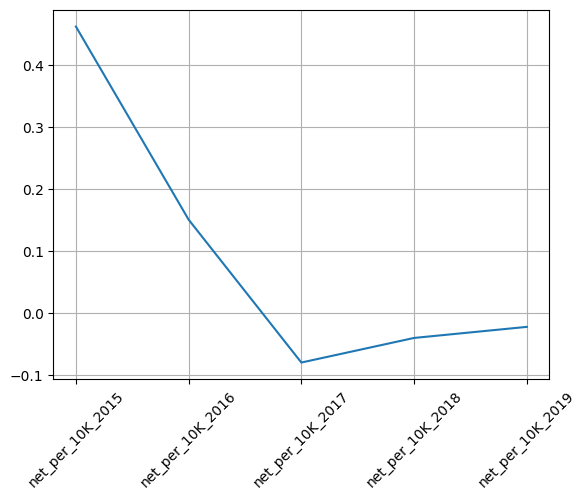

In [20]:
plt.plot(labels,net_per_10k_df_means)
plt.xticks(rotation =45)
plt.grid()

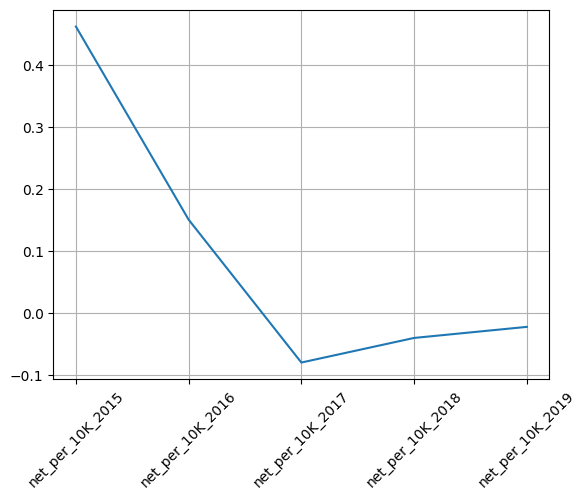

In [21]:
plt.plot(labels,net_per_10k_df_means)
plt.xticks(rotation =45)
plt.grid()
plt.show()

### Exercise 5 - Creating a Bar chart for yearly migration
---
Create a bar chart which shows the total net migration for the years 2015-2019  

* split the migration columns into a new dataframe
* create a data variable from the max() of the five columns
* create a labels variable, this time just create a list of the 5 years ['2015','2016','2017','2018','2019']
* plot the bar chart

***Presentation tips***:
* use plt.xlabel('Year') and plt.ylabel('Total net migration') to name your axis
* display your bar graph with plt.show

In [22]:
net_per_10k_max = net_per_10k_df.max()

In [23]:
labels =  ['2015','2016','2017','2018','2019']

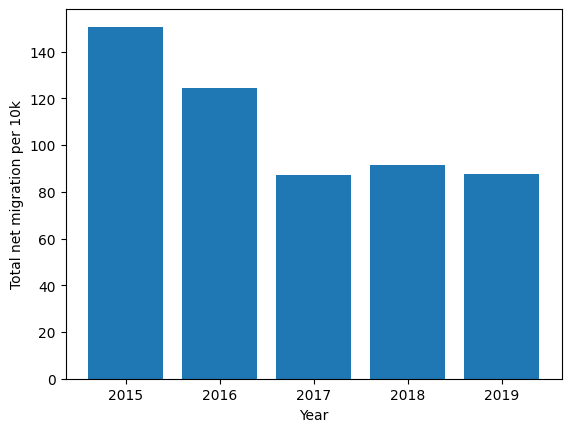

In [24]:
plt.bar(labels,net_per_10k_max)
plt.xlabel('Year')
plt.ylabel('Total net migration per 10k')
plt.show()

### Exercise 6 - creating a bar graph using grouped data
---

Create a horizontal bar chart of 2019 mean immigration for each income level ('`target_country_wb_income`')

* create a data variable which contains the means, grouped by '`target_country_wb_income`'
* extract your labels (x) using the .keys() function
* use the plt.barh(x, y) to create a horizontal bar graph
* add labels to the axes ('Year', 'Net Migration')  
* show the plot  

Try using plt.bar(x,y) - can you see why horizontally is more appropriate?

In [25]:
order = ['Low Income', 'Lower Middle Income','Upper Middle Income','High Income']
grouped_df = migration_df.groupby('target_country_wb_income')['net_per_10K_2019'].mean()

In [26]:
grouped_df = grouped_df.reindex(order)

In [27]:
display(order)
grouped_df

['Low Income', 'Lower Middle Income', 'Upper Middle Income', 'High Income']

target_country_wb_income
Low Income             0.072162
Lower Middle Income    0.940092
Upper Middle Income    0.455128
High Income           -0.467458
Name: net_per_10K_2019, dtype: float64

([0, 1, 2, 3],
 [Text(0, 0, 'Low Income'),
  Text(1, 0, 'Lower Middle Income'),
  Text(2, 0, 'Upper Middle Income'),
  Text(3, 0, 'High Income')])

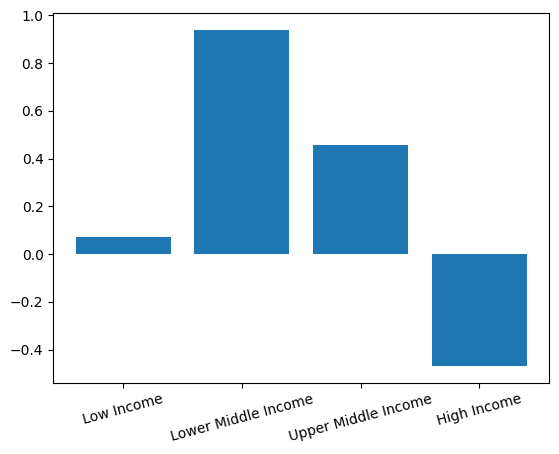

In [28]:
plt.bar(grouped_df.index,grouped_df)
plt.xticks(rotation =15)

# Pie Charts, Box Plots, Scatter Plots and Histograms
---

For these exercises you will use the Psychology dataset: "https://github.com/lilaceri/Working-with-data-/blob/b157a2feceb7709cf82426932385706d65446270/Data%20Sets%20for%20code%20divisio/Positive_Psychology_2017.csv?raw=true"

To get the data ready:

* read csv file above and save into a new variable called `psych_data`

### Exercise 7 - Creating a pie chart of stress data
---
Create a pie chart which shows how stressed students who speak different languages are.   

To do this:

* similar to Exercise 6 - create a variable which groups the means of data by firstlanguage  
* store the means for 'Stress' in a variable called data
* extract your labels using the keys() function
* plot your pie chart using plt.pie(data, labels = labels)
* write a comment noting anything interesting about the visualisation




In [29]:
psych_data = pd.read_csv("https://github.com/fraserrbarclay/PythonWork-CodeDivision-10-23/raw/main/data/Positive_Psychology_2017.csv")

In [30]:
psych_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Age            44 non-null     int64  
 1   English        44 non-null     object 
 2   firstlanguage  18 non-null     object 
 3   sex            44 non-null     object 
 4   origin         44 non-null     object 
 5   Ukresidence    44 non-null     float64
 6   MAAS           44 non-null     float64
 7   Resilliance    44 non-null     int64  
 8   Wellbeing      44 non-null     int64  
 9   Stress         44 non-null     int64  
 10  selfesteem     44 non-null     int64  
 11  LoC            44 non-null     int64  
 12  sleep          44 non-null     int64  
 13  Year           44 non-null     int64  
dtypes: float64(2), int64(8), object(4)
memory usage: 4.9+ KB


In [34]:
language_psych = psych_data.groupby("firstlanguage").mean()
language_psych.head()

<ipython-input-34-2f8c93d1622d>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  language_psych = psych_data.groupby("firstlanguage").mean()


,Age,Ukresidence,MAAS,Resilliance,Wellbeing,Stress,selfesteem,LoC,sleep,Year
firstlanguage,,,,,,,,,,
Arabic,23.000000,0.000000,3.600000,36.500000,18.000000,28.000000,15.500000,13.000000,21.000000,2017.0
Burmese,26.000000,0.000000,4.130000,26.000000,20.000000,20.000000,18.000000,20.000000,24.000000,2017.0
Chinese,24.333333,0.277778,3.333333,34.222222,23.555556,22.888889,18.222222,13.777778,18.777778,2017.0
German,26.000000,0.000000,2.600000,40.000000,36.000000,3.000000,28.000000,4.000000,26.000000,2017.0
Greek,24.000000,0.000000,4.000000,42.000000,30.000000,32.000000,19.000000,5.000000,22.000000,2017.0


In [36]:
data = language_psych['Stress']
data

firstlanguage
Arabic      28.000000
Burmese     20.000000
Chinese     22.888889
German       3.000000
Greek       32.000000
Hindi       17.000000
Japanese    14.000000
Romanian    27.000000
Slovak      21.000000
Name: Stress, dtype: float64

In [40]:
labels = data.keys()
labels

Index(['Arabic', 'Burmese', 'Chinese', 'German', 'Greek', 'Hindi', 'Japanese',
       'Romanian', 'Slovak'],
      dtype='object', name='firstlanguage')

Text(0.5, 1.0, 'Stress of people by language')

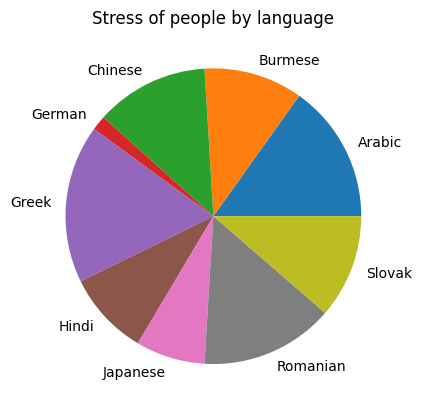

In [43]:
plt.pie(data,labels=labels)
plt.title('Stress of people by language')

### Exercise 8 - Creating a box plot of Wellbeing
---
A box plot is used to visualise summary infomation about a data series such as the min, max and median.

Create a box plot of the Wellbeing scores

*  split off the wellbeing column  
*  use plt.boxplot(data, labels="Wellbeing") to create boxplot
*  show the boxplot

{'whiskers': [<matplotlib.lines.Line2D at 0x79574f964670>,
 'caps': [<matplotlib.lines.Line2D at 0x79574f964bb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x79574f9643d0>],
 'medians': [<matplotlib.lines.Line2D at 0x79574f9650f0>],
 'fliers': [<matplotlib.lines.Line2D at 0x79574f965390>],
 'means': []}

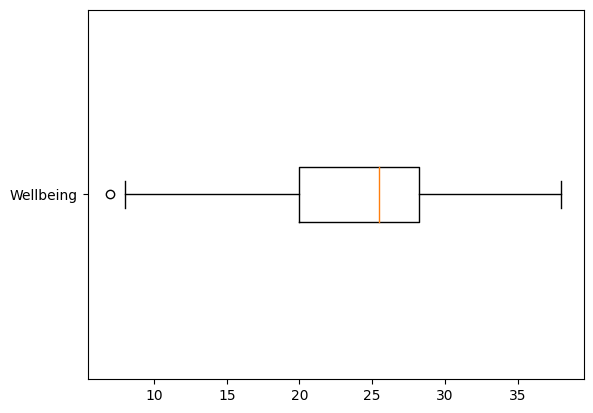

In [60]:
plt.boxplot(psych_data['Wellbeing'],labels=['Wellbeing'],vert=False)

### Exercise 9 - Histograms of  age
---

Create a histogram which shows the frequency distribution for '`Wellbeing`'.

* split the `Wellbeing` column off to provide the data
* plot the histogram using `plt.hist(data)`
* add labels using `plt.xlabel()` and `plt.ylabel()`
* change the colours of the bars - try plt.hist(x, color = 'red')
* show the plot


Text(0, 0.5, 'Frequency')

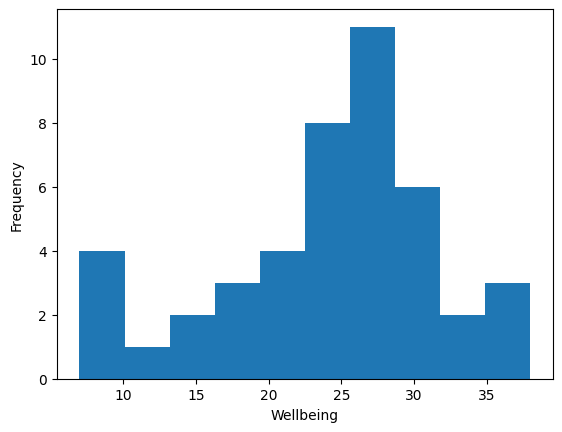

In [67]:
data = psych_data['Wellbeing']
plt.hist(data)
plt.xlabel('Wellbeing')
plt.ylabel('Frequency')

<Axes: ylabel='Frequency'>

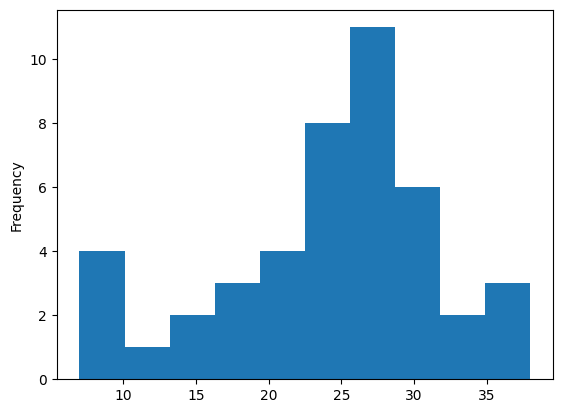

In [66]:
psych_data['Wellbeing'].plot.hist()

### Exercise 10 - Create a scatterplot of Wellbeing and Stress with line of best fit
---

Earlier in exercise 3, we found that Stress significantly predicted Wellbeing.

Create a scatterplot of Wellbeing and Stress data.

* create **x** from the `Stress` column
* create *y* from the `Wellbeing` column
* use `plt.scatter(x,y)` to create a scatterplot
* add x axis and y axis labels using `plt.xlabel('Stress')` and `plt.ylabel('Wellbeing')`
*  

Adding a line of best fit:   

* create a regression variable and assign the result of using linregress
* store the slope and intercept (`slope = regression.slope`, `intercept = regression.intercept`)
* plt.plot(x, slope*x + intercept)

Show the plots.

Write a short data story ( a description of the data.  What conclusion could be reached from the chart?  How confident could you be in this conclusion and why?




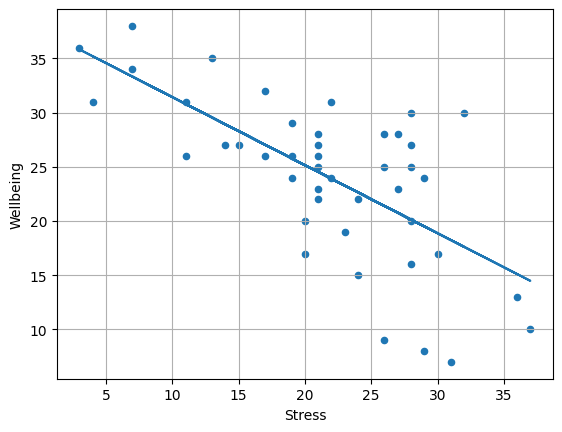

In [72]:
psych_data.plot.scatter(x='Stress',y='Wellbeing')
x=psych_data['Stress']
y=psych_data['Wellbeing']
plt.grid()
plt.plot(x,linregress(x,y).slope*x+linregress(x,y).intercept)

## Data story
---

Add your data story here

# Further reference on w3schools

[Matplotlib on w3schools](https://www.w3schools.com/python/matplotlib_intro.**asp**)